In [1]:
# dependencies
import pandas as pd
import numpy as np

In [2]:
# read in CSV
all_wines = pd.read_csv('Data/winemag-data-130k-v2.csv')
all_wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# add vintage year based on year in title
all_wines['vintage'] = all_wines['title'].str.extract('(\d\d\d\d)', expand=True)

# filling in known variety for nulls
all_wines.iloc[86909, 7] = 'Syrah-Petite Sirah'

# drop unneeded columns
clean_wines = all_wines.drop(columns=['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'title', \
                                      'taster_name', 'taster_twitter_handle'])

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
44910,France,85,NaN,Bordeaux,Bordeaux-style Red Blend,Château Taffard de Blaignan,2013
94060,Canada,90,30.0,Ontario,Riesling,Cave Spring,2009
54588,US,88,45.0,California,Zinfandel,Dutton-Goldfield,2010
54318,Italy,95,80.0,Southern Italy,Aglianico,Mastroberardino,2008
111148,France,90,NaN,Bordeaux,Bordeaux-style Red Blend,Château Rolland-Maillet,2010
66859,US,89,20.0,California,Chardonnay,Poiema,2013
23402,Italy,87,24.0,Lombardy,Chardonnay,Cà del Vént,NaN
52236,Austria,87,NaN,Burgenland,Grüner Veltliner,Höpler,2012
11818,US,88,35.0,Washington,Grenache,Robert Ramsay,2012
32051,US,91,38.0,California,Blaufränkisch,Solminer,2015


In [4]:
# filling in known country for nulls
has_country = clean_wines[pd.notnull(clean_wines['country'])]
has_country_series = pd.Series(data=has_country['country'].values, index=has_country['winery'])
has_country_dict = has_country_series.to_dict()
clean_wines.loc[clean_wines['country'].isnull(), 'country'] \
    = clean_wines['country'].fillna(clean_wines['winery'].map(has_country_dict))

# drop the remaining nulls
clean_wines = clean_wines.dropna()

# replace variety names with common wine names
clean_wines['variety'] = clean_wines['variety'].replace(['Weissburgunder'], 'Chardonnay')
clean_wines['variety'] = clean_wines['variety'].replace(['Spatburgunder'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Grauburgunder'], 'Pinot Gris')
clean_wines['variety'] = clean_wines['variety'].replace(['Garnacha'], 'Grenache')
clean_wines['variety'] = clean_wines['variety'].replace(['Pinot Nero'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Alvarinho'], 'Albarino')

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
2846,Italy,88,75.0,Tuscany,Red Blend,Guicciardini Strozzi,2012
80371,US,84,8.0,California,Cabernet Sauvignon,Round Hill,2011
99326,France,95,90.0,Alsace,Gewürztraminer,Domaine Barmès-Buecher,2013
6723,US,91,55.0,Washington,Bordeaux-style Red Blend,Milbrandt,2012
93527,Chile,87,10.0,Limarí Valley,Cabernet Sauvignon,Tamaya,2008
10752,Portugal,94,49.0,Península de Setúbal,Bordeaux-style Red Blend,Bacalhôa Wines of Portugal,2007
22849,US,93,80.0,California,Pinot Noir,Sanguis,2013
73551,Italy,88,20.0,Tuscany,Vermentino,Poggio al Tesoro,2009
95323,Canada,91,95.0,Ontario,Cabernet Franc,Peller,2011
89772,Argentina,89,15.0,Mendoza Province,Malbec,Mascota,2013


count    116778.000000
mean         88.457406
std           3.045578
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

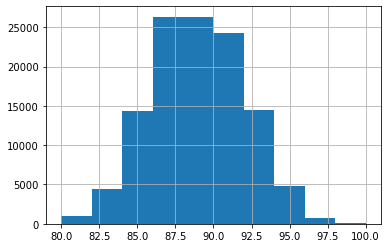

In [5]:
# plot histogram
clean_wines['points'].hist()

# decribe dataframe
clean_wines['points'].describe()

In [6]:
# add rating
clean_wines['quality'] = clean_wines['points'].apply(lambda x: 'Good' if x >= 88 else 'Poor')
clean_wines = clean_wines.drop(columns = ['points'])

# create export of final dataframe
clean_wines.to_csv('Data/recommend_neural_model_df.csv')

# sample
clean_wines.sample(10)

,country,price,province,variety,winery,vintage,quality
40500,Austria,24.0,Kamptal,Grüner Veltliner,Steininger,2012,Good
19370,US,24.0,California,Zinfandel,Seghesio,2011,Good
85172,Italy,40.0,Sicily & Sardinia,Red Blend,Tenuta delle Terre Nere,2014,Good
124770,US,45.0,California,Pinot Noir,Carr,2008,Poor
128528,US,40.0,California,Pinot Noir,Calstar Cellars,2012,Good
48473,US,50.0,California,Chardonnay,Sterling,2005,Poor
124495,Portugal,11.0,Alenquer,Portuguese Red,Casa Santos Lima,2013,Good
26021,France,15.0,Rhône Valley,Rhône-style White Blend,Andrieux & Fils,2010,Poor
30793,US,35.0,California,Cabernet Sauvignon,Nadia,2012,Good
15743,Portugal,18.0,Dão,Portuguese Red,Vinha Paz,2015,Good


In [7]:
# LabelEncoder dependency
from sklearn.preprocessing import LabelEncoder

# create features
number = LabelEncoder()
features = clean_wines[['country','price','province','variety','winery','vintage']]
features['country'] = number.fit_transform(features['country'].astype('str'))
features['province'] = number.fit_transform(features['province'].astype('str'))
features['variety'] = number.fit_transform(features['variety'].astype('str'))
features['winery'] = number.fit_transform(features['winery'].astype('str'))

# features 
features.sample(10)

C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,country,price,province,variety,winery,vintage
28473,30,13.0,348,13,6759,2012
117596,36,79.0,335,456,14440,2008
36067,39,35.0,51,423,6078,2010
53899,30,14.0,106,433,404,2014
123110,39,16.0,51,673,12855,2014
96906,39,19.0,51,473,4637,2013
118780,21,24.0,253,418,9227,2009
121911,21,36.0,253,253,6933,2009
86173,16,42.0,226,462,5991,2015
63353,39,55.0,51,423,7367,2012


In [8]:
X = features
y = clean_wines['quality'].astype('category')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
X_train.head()

,country,price,province,variety,winery,vintage
100326,39,30.0,51,8,1610,2016
17304,8,20.0,61,495,9900,2013
45169,2,13.0,406,516,15303,2007
61058,3,29.0,378,462,7517,2014
31290,0,35.0,210,271,386,2013


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=6))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 42,002
Trainable params: 42,002
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
2737/2737 - 3s - loss: 0.5330 - accuracy: 0.7300
Epoch 2/100


KeyboardInterrupt: 

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
d = {'prediction' : prediction_labels, 
     'actual' : y_test}

In [ ]:
predictions_df = pd.DataFrame(data=d)
predictions_df

In [ ]:
predictions_df.to_csv('Data/recommend_neural_model_predictions_df.csv')